In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np



In [2]:
# Memuat dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

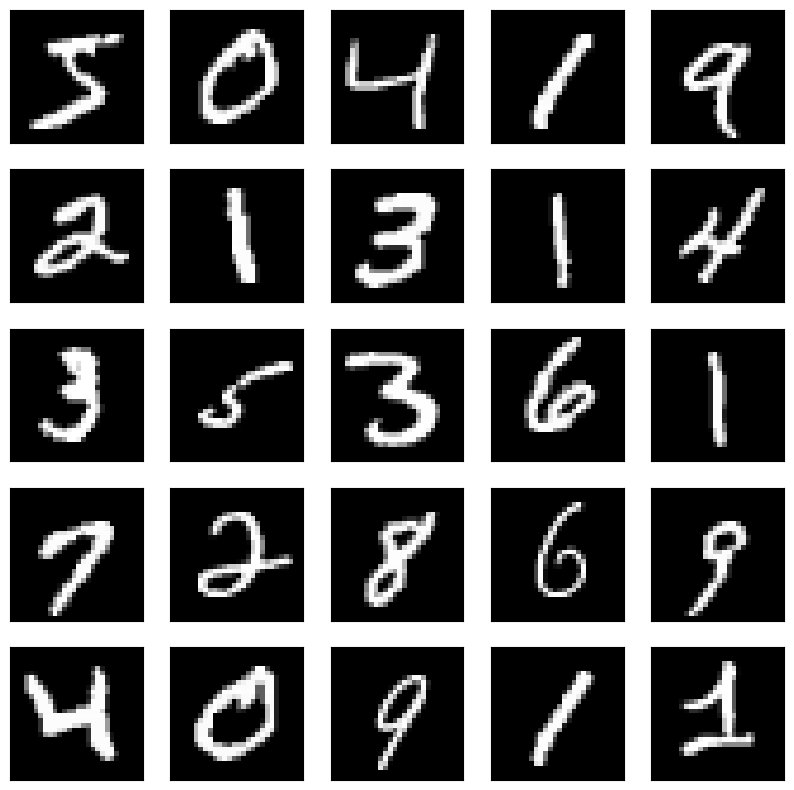

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
   
plt.show()

In [6]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Layer Fully Connected
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Menggunakan dropout untuk regularisasi
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [8]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10, 
    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.1571 - accuracy: 0.9535 - val_loss: 0.0679 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0713 - accuracy: 0.9798 - val_loss: 0.0854 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0555 - accuracy: 0.9843 - val_loss: 0.0307 - val_accuracy: 0.9915
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0473 - accuracy: 0.9870 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0404 - accuracy: 0.9885 - val_loss: 0.0249 - val_accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0364 - accuracy: 0.9897 - val_loss: 0.0300 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0375 - val_ac

313/313 - 1s - loss: 0.0323 - accuracy: 0.9920 - 586ms/epoch - 2ms/step


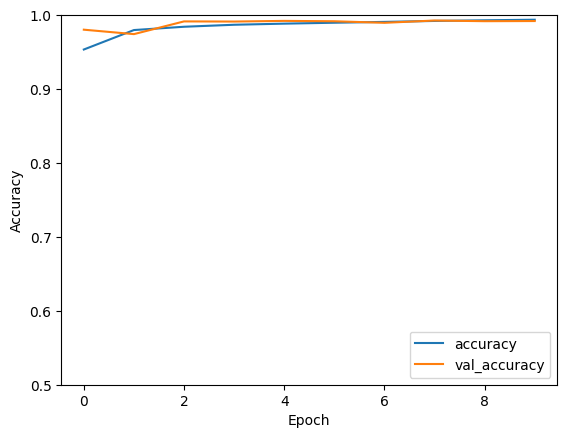

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [11]:
print(test_acc)

0.9919999837875366
